# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 610


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    url = "https://api.openweathermap.org/data/2.5/weather"
    city_url = f"{url}?appid={weather_api_key}&q={city}"
    response = requests.get(city_url).json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather.json()["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = (response["main"]["temp_max"]- 273.15) * 9/5 + 32
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        
 # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | levuka
Processing Record 2 of Set 1 | vernon
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | emerald
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | villa regina
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | enriquillo
Processing Record 11 of Set 1 | trujillo
Processing Record 12 of Set 1 | progreso
Processing Record 13 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 14 of Set 1 | sabinanigo
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | kingston
Processing Record 17 of Set 1 | poronaysk
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | chonchi
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 

Processing Record 38 of Set 4 | ciudad bolivar
Processing Record 39 of Set 4 | tual
Processing Record 40 of Set 4 | penzance
Processing Record 41 of Set 4 | sanibel
Processing Record 42 of Set 4 | kismayo
Processing Record 43 of Set 4 | sidi ifni
Processing Record 44 of Set 4 | bloomfield
Processing Record 45 of Set 4 | domna
Processing Record 46 of Set 4 | dakhla
Processing Record 47 of Set 4 | recani
Processing Record 48 of Set 4 | selfoss
Processing Record 49 of Set 4 | diamantino
Processing Record 0 of Set 5 | kapa'a
Processing Record 1 of Set 5 | saipan
Processing Record 2 of Set 5 | grodkow
Processing Record 3 of Set 5 | paracuru
Processing Record 4 of Set 5 | baardheere
Processing Record 5 of Set 5 | macau
Processing Record 6 of Set 5 | severo-yeniseyskiy
Processing Record 7 of Set 5 | aasiaat
Processing Record 8 of Set 5 | chon daen
Processing Record 9 of Set 5 | reyes
Processing Record 10 of Set 5 | hithadhoo
Processing Record 11 of Set 5 | tafuna
Processing Record 12 of Set 5

Processing Record 31 of Set 8 | fort bragg
Processing Record 32 of Set 8 | sao vicente
Processing Record 33 of Set 8 | pita
Processing Record 34 of Set 8 | antakotako
City not found. Skipping...
Processing Record 35 of Set 8 | sarmiento
Processing Record 36 of Set 8 | praia da vitoria
Processing Record 37 of Set 8 | eldorado
Processing Record 38 of Set 8 | narauli
Processing Record 39 of Set 8 | changji
Processing Record 40 of Set 8 | bel ombre
Processing Record 41 of Set 8 | masuguru
Processing Record 42 of Set 8 | souillac
Processing Record 43 of Set 8 | bankura
Processing Record 44 of Set 8 | fannuj
City not found. Skipping...
Processing Record 45 of Set 8 | petropavlovsk-kamchatsky
Processing Record 46 of Set 8 | tarko-sale
Processing Record 47 of Set 8 | pulandian
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 0 of Set 9 | nookat
City not found. Skipping...
Processing Record 1 of Set 9 | karratha
Proc

Processing Record 18 of Set 12 | lhokseumawe
Processing Record 19 of Set 12 | presidencia de la plaza
Processing Record 20 of Set 12 | forster
Processing Record 21 of Set 12 | bikin
Processing Record 22 of Set 12 | santa marta
Processing Record 23 of Set 12 | arapgir
Processing Record 24 of Set 12 | nieuw amsterdam
Processing Record 25 of Set 12 | cill airne
Processing Record 26 of Set 12 | phayakkhaphum phisai
Processing Record 27 of Set 12 | kayangel
Processing Record 28 of Set 12 | waddan
Processing Record 29 of Set 12 | qandala
Processing Record 30 of Set 12 | sishilichengzi
City not found. Skipping...
Processing Record 31 of Set 12 | kachia
Processing Record 32 of Set 12 | anchorage
Processing Record 33 of Set 12 | okhotsk
Processing Record 34 of Set 12 | happy valley-goose bay
Processing Record 35 of Set 12 | kiruna
Processing Record 36 of Set 12 | lhasa
Processing Record 37 of Set 12 | labytnangi
Processing Record 38 of Set 12 | val-d'or
Processing Record 39 of Set 12 | santo an

In [8]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count

city_data_df.count()


City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,levuka,50.1834,-105.4011,49.820,69,90,1.36,CA,1715229292
1,vernon,50.2581,-119.2691,58.532,43,3,1.54,CA,1715229292
2,stanley,54.8680,-1.6985,51.278,89,0,1.03,GB,1715229292
3,emerald,-23.5333,148.1667,74.336,57,100,7.35,AU,1715229292
4,invercargill,-46.4000,168.3500,48.020,72,25,3.58,NZ,1715229293


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,levuka,50.1834,-105.4011,49.820,69,90,1.36,CA,1715229292
1,vernon,50.2581,-119.2691,58.532,43,3,1.54,CA,1715229292
2,stanley,54.8680,-1.6985,51.278,89,0,1.03,GB,1715229292
3,emerald,-23.5333,148.1667,74.336,57,100,7.35,AU,1715229292
4,invercargill,-46.4000,168.3500,48.020,72,25,3.58,NZ,1715229293


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

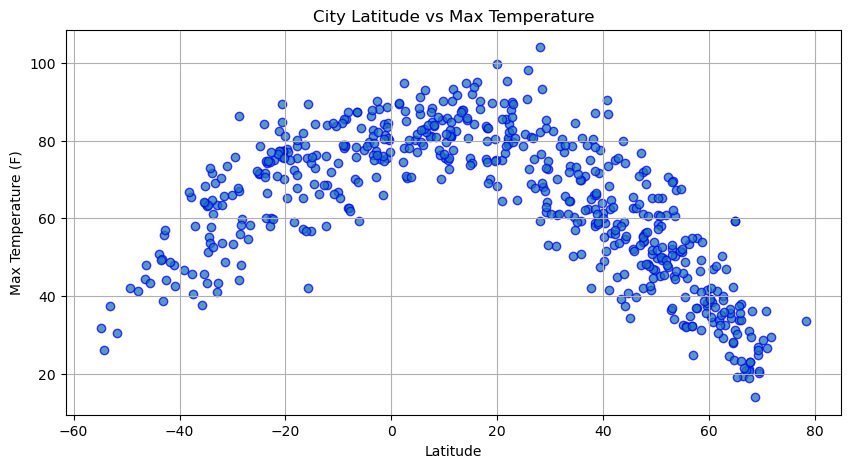

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
Latitude_Temperature, ax1 = plt.subplots(figsize=(10,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "b", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("../Latitude_Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

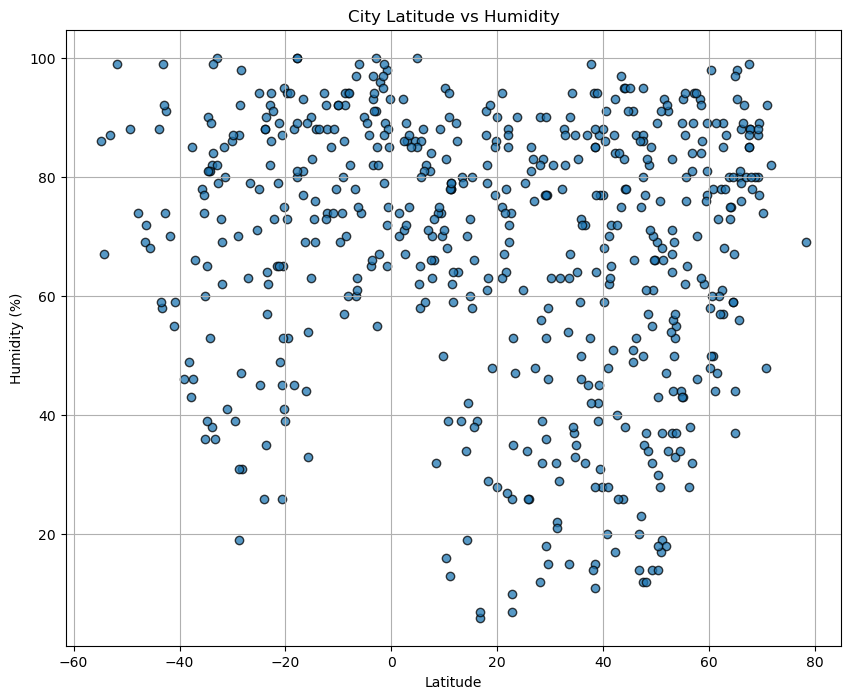

In [13]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
Latitude_Humidity, ax1 = plt.subplots(figsize=(10, 8))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')
plt.grid()

# Save the figure
plt.savefig("../Latitude_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

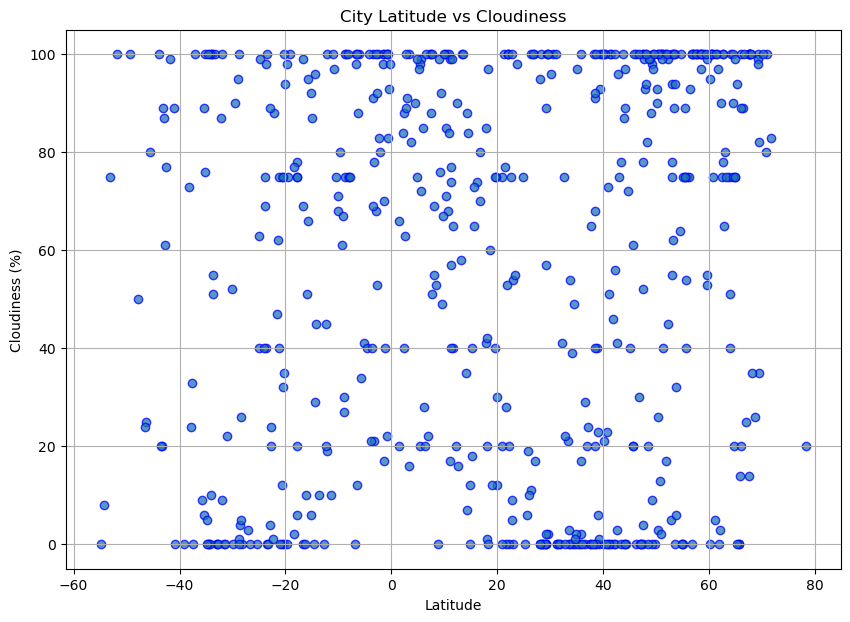

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
Latitude_Cloudiness, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "b", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')
plt.grid()

# Save the figure
plt.savefig("../Latitude_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

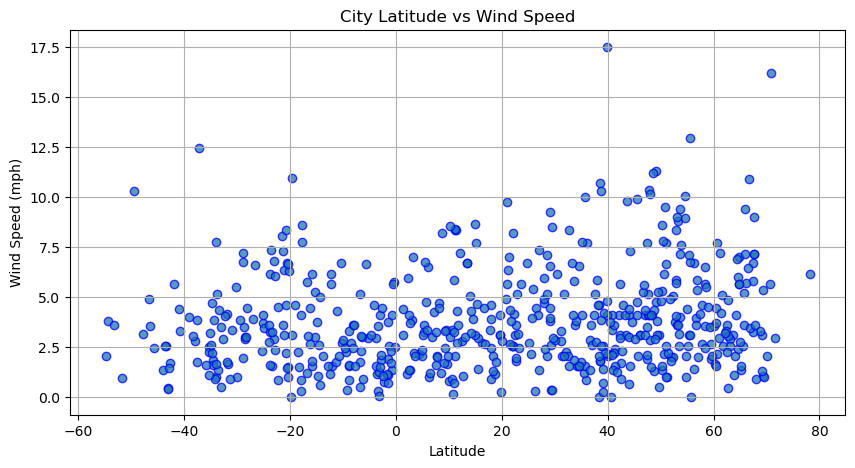

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
Latitude_WindSpeed, ax1 = plt.subplots(figsize=(10,5))
plt.scatter(x_values, y_values,alpha = 0.75, edgecolors = "b", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed')
plt.grid()

# Save the figure
plt.savefig("../Latitude_WindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
     
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'



In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,levuka,50.1834,-105.4011,49.820,69,90,1.36,CA,1715229292
1,vernon,50.2581,-119.2691,58.532,43,3,1.54,CA,1715229292
2,stanley,54.8680,-1.6985,51.278,89,0,1.03,GB,1715229292
6,longyearbyen,78.2186,15.6401,33.638,69,20,6.17,SJ,1715229293
8,enriquillo,17.9000,-71.2333,75.344,91,41,3.93,DO,1715229293


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,emerald,-23.5333,148.1667,74.336,57,100,7.35,AU,1715229292
4,invercargill,-46.4000,168.3500,48.020,72,25,3.58,NZ,1715229293
5,villa regina,-39.1000,-67.0667,46.652,46,0,4.01,AR,1715229293
7,hermanus,-34.4187,19.2345,55.220,81,0,1.86,ZA,1715229293
9,trujillo,-8.1160,-79.0300,62.564,94,75,3.60,PE,1715229126


###  Temperature vs. Latitude Linear Regression Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-value is: -0.8613894299540239


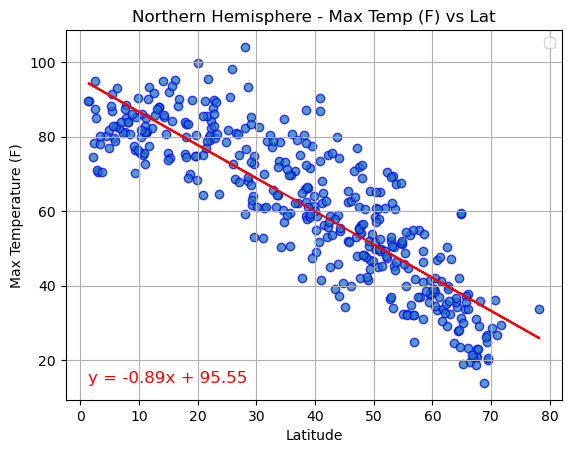

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Northern Hemisphere - Max Temp (F) vs Lat")
print(f"The r-value is: {rvalue}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend()
plt.grid(True)

plt.savefig("../northern_hemi_Max_lat_lin.png")
plt.show()

Discussion about the linear relationship:The max temp and latitudes show a strong negative corelation in the southern hemisphere, with a r-svalue of -0.88 for the regression line.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-value is: 0.7556924886220219


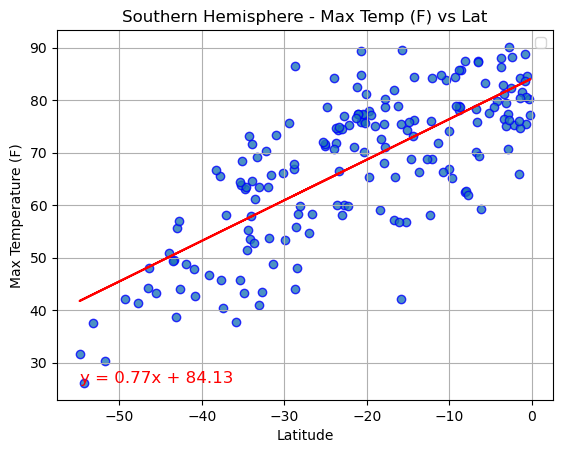

In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.scatter(x_values, y_values, alpha=0.80, edgecolors="b", linewidths=1)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='red')

plt.title(f"Southern Hemisphere - Max Temp (F) vs Lat")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend()
plt.grid(True)

plt.savefig("../southern_hemi_Max_lat_lin.png")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-value is: 0.03746735592377027


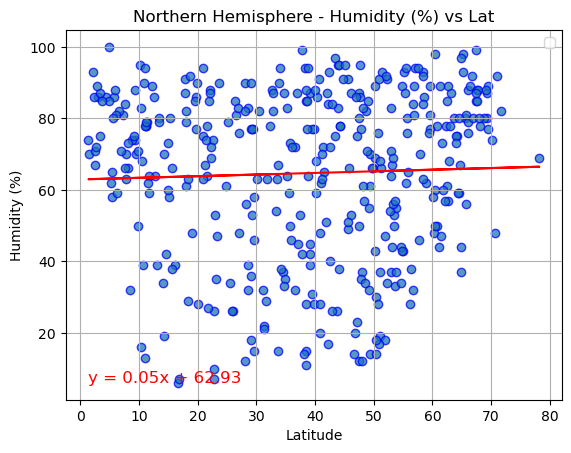

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Northern Hemisphere - Humidity (%) vs Lat")
print(f"The r-value is: {rvalue}")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)

plt.savefig("../northern_Humidity_lat_lin.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-value is: 0.23186877547839344


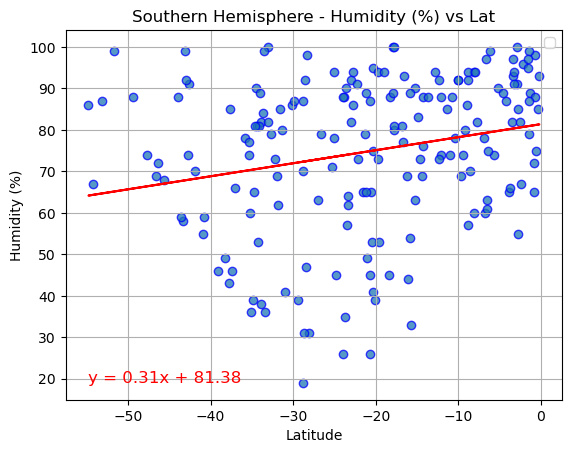

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Southern Hemisphere - Humidity (%) vs Lat")
print(f"The r-value is: {rvalue}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)

plt.savefig("../sorthern_Humidity_lat_lin.png")
plt.show()

Discussion about the linear relationship:Humidity and latitude did not show any corelation in either hemishphere.

### Cloudiness vs. Latitude Linear Regression Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-value is: 0.09741314445792242


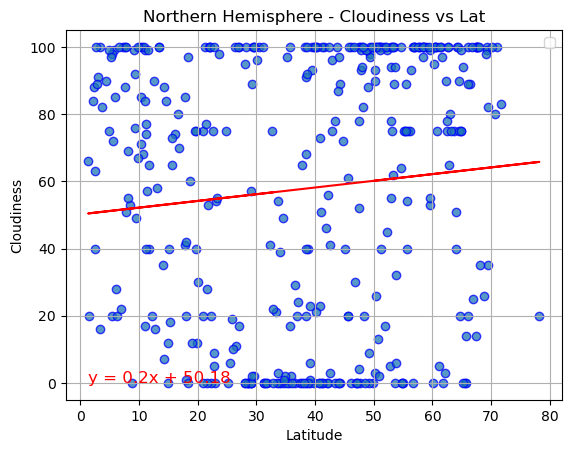

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Northern Hemisphere - Cloudiness vs Lat")
print(f"The r-value is: {rvalue}")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend()
plt.grid(True)

plt.savefig("../northern_hemi_Cloudiness_lat_lin.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-value is: 0.22301781624094877


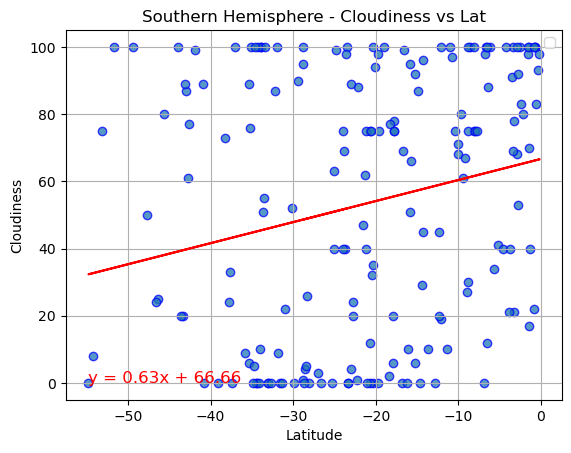

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Southern Hemisphere - Cloudiness vs Lat")
print(f"The r-value is: {rvalue}")


plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.legend()
plt.grid(True)

plt.savefig("../southern_hemi_Cloudiness_lat_lin.png")
plt.show()

Discussion about the linear relationship: Cloudiness and latitude did not show any corelation in northern hemishphere. The correlation was higher in southern hemisphere but the level was still below the mild corelation value of 0.5. 

### Wind Speed vs. Latitude Linear Regression Plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-value is: 0.12960201189484777


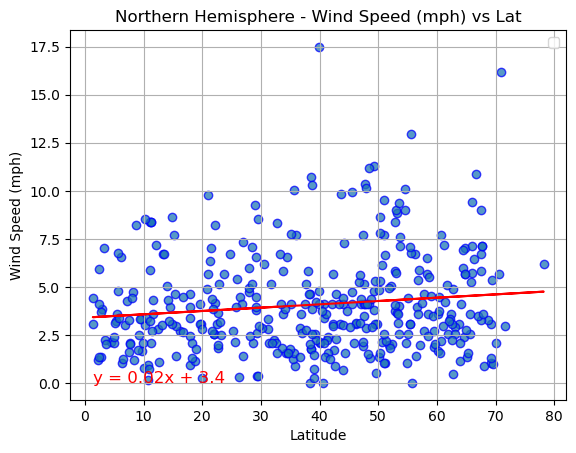

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Northern Hemisphere - Wind Speed (mph) vs Lat")
print(f"The r-value is: {rvalue}")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()
plt.grid(True)

plt.savefig("../northern_hemi_WindSpeed_lat_lin.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The r-value is: -0.11588179938653756


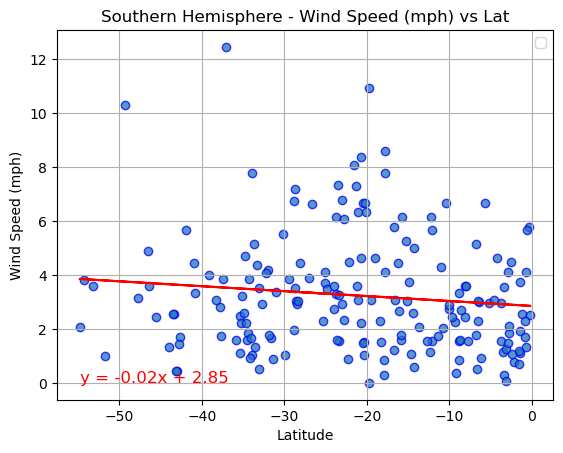

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

# Create a scatter plot with linear regression
plt.scatter(x_values, y_values, alpha=0.75, edgecolors="b", linewidths=1)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=12, color='r')

plt.title(f"Southern Hemisphere - Wind Speed (mph) vs Lat")
print(f"The r-value is: {rvalue}")


plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()
plt.grid(True)

plt.savefig("../southern_hemi_WindSpeed_lat_lin.png")
plt.show()

Discussion about the linear relationship: Wind speed and latitude did not show any corelation in either hemishphere.